# 6.4 Supervised Machine Learning - Regression

### This script contains the following:

#### 1. Importing libraries and data

#### 2. Data cleaning

#### 3. Data prep for regression analysis

#### 4. Regression analysis

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r"C:\Users\maple\OneDrive\Desktop\CareerFoundry\Open Source Project"

In [4]:
# Import data

df = pd.read_csv(os.path.join(path,'Data','Prepared Data', 'spotify_clean.csv'), index_col = False)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,song_id,rank,artist_names,number_of_artists,artist_individual,artist_genre,collab,track_name,release_date,number_of_album_tracks,record_label,peak_rank,previous_rank,weeks_on_chart,weekly_streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
0,0,0,1,Paulo Londra,1,Paulo Londra,argentine hip hop,False,Plan A,2022-03-23,1,WEA Latina,1,1.0,4,3003411,2022-04-14,0.583,0.834,0,1,-4.875,0.0444,0.0495,0.000000,0.0658,0.557,173.935,178203,Argentina,South America,Spanish
1,1,1,2,WOS,1,WOS,argentine indie,False,ARRANCARMELO,2022-04-06,1,DOGUITO Records / DALE PLAY Records,2,129.0,2,2512175,2022-04-14,0.654,0.354,5,1,-7.358,0.0738,0.7240,0.000000,0.1340,0.262,81.956,183547,Argentina,South America,Spanish
2,2,2,3,Paulo Londra,1,Paulo Londra,argentine hip hop,False,Chance,2022-04-06,2,WEA Latina,3,59.0,2,2408983,2022-04-14,0.721,0.463,1,0,-9.483,0.0646,0.2410,0.000000,0.0929,0.216,137.915,204003,Argentina,South America,Spanish
3,3,3,5,Cris Mj,1,Cris Mj,urbano chileno,False,Una Noche en Medellín,2022-01-21,1,Nabru Records LLC,5,5.0,8,2080139,2022-04-14,0.870,0.548,10,0,-5.253,0.0770,0.0924,0.000046,0.0534,0.832,96.018,153750,Argentina,South America,Spanish
4,4,4,6,Emilia,1,Emilia,pop argentino,False,cuatro veinte,2022-03-24,1,Sony Music Latin,6,9.0,3,1923270,2022-04-14,0.761,0.696,7,0,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895,Argentina,South America,Spanish


In [6]:
# Dropping unecessary columns
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,song_id,rank,artist_names,number_of_artists,artist_individual,artist_genre,collab,track_name,release_date,number_of_album_tracks,record_label,peak_rank,previous_rank,weeks_on_chart,weekly_streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
0,0,1,Paulo Londra,1,Paulo Londra,argentine hip hop,False,Plan A,2022-03-23,1,WEA Latina,1,1.0,4,3003411,2022-04-14,0.583,0.834,0,1,-4.875,0.0444,0.0495,0.000000,0.0658,0.557,173.935,178203,Argentina,South America,Spanish
1,1,2,WOS,1,WOS,argentine indie,False,ARRANCARMELO,2022-04-06,1,DOGUITO Records / DALE PLAY Records,2,129.0,2,2512175,2022-04-14,0.654,0.354,5,1,-7.358,0.0738,0.7240,0.000000,0.1340,0.262,81.956,183547,Argentina,South America,Spanish
2,2,3,Paulo Londra,1,Paulo Londra,argentine hip hop,False,Chance,2022-04-06,2,WEA Latina,3,59.0,2,2408983,2022-04-14,0.721,0.463,1,0,-9.483,0.0646,0.2410,0.000000,0.0929,0.216,137.915,204003,Argentina,South America,Spanish
3,3,5,Cris Mj,1,Cris Mj,urbano chileno,False,Una Noche en Medellín,2022-01-21,1,Nabru Records LLC,5,5.0,8,2080139,2022-04-14,0.870,0.548,10,0,-5.253,0.0770,0.0924,0.000046,0.0534,0.832,96.018,153750,Argentina,South America,Spanish
4,4,6,Emilia,1,Emilia,pop argentino,False,cuatro veinte,2022-03-24,1,Sony Music Latin,6,9.0,3,1923270,2022-04-14,0.761,0.696,7,0,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895,Argentina,South America,Spanish


# 2. Data cleaning

#### variable renaming, data type amendments, summary statistics, and missing values have already been cleaned in prior exercises. This step will focus on identifying outliers via density plots. 

C:\Users\maple\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='peak_rank', ylabel='Density'>

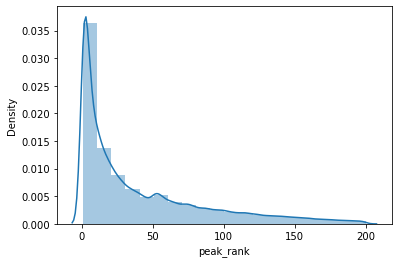

In [6]:
sns.distplot(df['peak_rank'], bins=20) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\maple\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weeks_on_chart', ylabel='Density'>

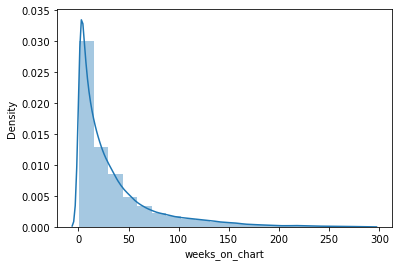

In [7]:
sns.distplot(df['weeks_on_chart'], bins=20) # Shows extreme values

#### Most songs have a peak rank of 1-10, and distribution decreases as peak rank moves closer to 200, the lowest possible rank on a chart. The majority of songs also spend between 1-20 weeks on a chart with distribution decreasing as weeks increase. For the purpose of this exercise we will see how well the regression model performs with outliers included.

In [40]:
# Creating a separate dataset without duplicates in order to conduct linear regression on previous_rank, which used 'n/a'
# for songs that didn't chart in the previous week
df2 = df.dropna()


# 3. Data prep for regression analysis

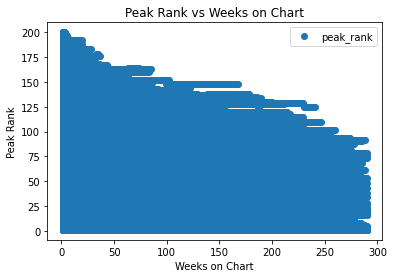

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. Peak rank and weeks on chart
df.plot(x = 'weeks_on_chart', y='peak_rank',style='o')
plt.title('Peak Rank vs Weeks on Chart')  
plt.xlabel('Weeks on Chart')  
plt.ylabel('Peak Rank')  
plt.show()

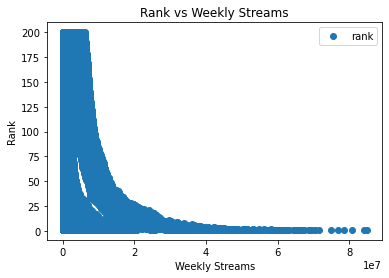

In [11]:
# 2. Weekly streams and rank
df.plot(x = 'weekly_streams', y='rank',style='o')
plt.title('Rank vs Weekly Streams')  
plt.xlabel('Weekly Streams')  
plt.ylabel('Rank')  
plt.show()

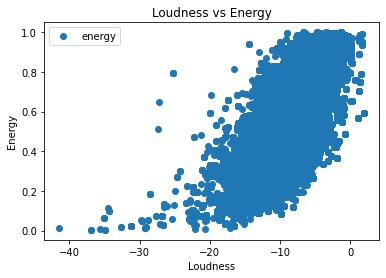

In [51]:
# 3. Weekly streams and rank
df.plot(x = 'loudness', y='energy',style='o')
plt.title('Loudness vs Energy')  
plt.xlabel('Loudness')  
plt.ylabel('Energy')  
plt.show()

#### Hypothesis 1: If a song spends more weeks on a chart, then it will have a "higher", or better performing, peak rank (closer to #1) 
#### Hypothesis 2: If a song has higher weekly streams, then it will have a "higher", or better performing, rank (closer to #1) 
#### Hypothesis 3: If a song has a higher loudness score, then it will have a higher energy score.
#### Hypothesis 4: If a song song has a higher previous rank, than its rank will be higher, or, a song's rank will closely follow it's previous rank.

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['weeks_on_chart'].values.reshape(-1,1)
y = df['peak_rank'].values.reshape(-1,1)

In [14]:
X

array([[ 4],
       [ 2],
       [ 2],
       ...,
       [30],
       [30],
       [30]], dtype=int64)

In [15]:
y

array([[  1],
       [  2],
       [  3],
       ...,
       [114],
       [114],
       [114]], dtype=int64)

In [16]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

Xx = df['weekly_streams'].values.reshape(-1,1)
yy = df['rank'].values.reshape(-1,1)

In [18]:
Xx

array([[3003411],
       [2512175],
       [2408983],
       ...,
       [  36817],
       [  36817],
       [  36817]], dtype=int64)

In [19]:
yy

array([[  1],
       [  2],
       [  3],
       ...,
       [199],
       [199],
       [199]], dtype=int64)

In [20]:
# Split data into a training set and a test set.

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.3, random_state=0)

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X3 = df['loudness'].values.reshape(-1,1)
y3 = df['energy'].values.reshape(-1,1)

In [22]:
X3

array([[-4.875],
       [-7.358],
       [-9.483],
       ...,
       [-6.32 ],
       [-6.32 ],
       [-6.32 ]])

In [23]:
y3

array([[0.834],
       [0.354],
       [0.463],
       ...,
       [0.8  ],
       [0.8  ],
       [0.8  ]])

In [24]:
# Split data into a training set and a test set.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [41]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X4 = df2['rank'].values.reshape(-1,1)
y4 = df2['previous_rank'].values.reshape(-1,1)

In [42]:
X4

array([[  1],
       [  2],
       [  3],
       ...,
       [199],
       [199],
       [199]], dtype=int64)

In [43]:
y4

array([[  1.],
       [129.],
       [ 59.],
       ...,
       [183.],
       [183.],
       [183.]])

In [44]:
# Split data into a training set and a test set.

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

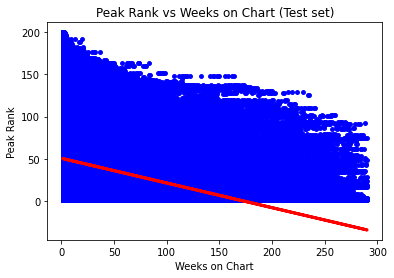

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Peak Rank vs Weeks on Chart (Test set)')
plot_test.xlabel('Weeks on Chart')
plot_test.ylabel('Peak Rank')
plot_test.show()

#### The line doesn't fit the data very well. There are many data points across increasing weeks on chart where peak rank is still low, and peak ranks that are high when the song hasn't spent many weeks on chart. The regression line also extends into negative peak rank which is not possible.

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.292853]]
Mean squared error:  1920.635504525331
R2 score:  0.07518191528314089


#### The slope of -.293 indicates a negative relationship between weeks on chart and peak rank. As weeks on chart increases, the peak rank decreases. The mean squared error is very large indicating that the regression line isn't an accurate representation of the data, and the r2 value of .075 is very low and close to 0, further indicating a poor fit. 

In [25]:
# Create a regression object.

regression_2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(Xx_train, yy_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

yy_predicted = regression.predict(Xx_test)

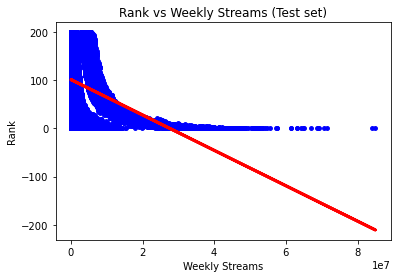

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xx_test, yy_test, color='blue', s = 15)
plot_test.plot(Xx_test, yy_predicted, color='red', linewidth =3)
plot_test.title('Rank vs Weekly Streams (Test set)')
plot_test.xlabel('Weekly Streams')
plot_test.ylabel('Rank')
plot_test.show()

#### The line doesn't fit the data very well. There are many data points where weekly streams is low but rank is still high performing. Rank does appear to move closer to 0 as weekly streams increases, but the regression line also extends into negative rank which is not possible.

In [30]:
#Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(yy_test, yy_predicted) # This is the mean squared error
r2_2 = r2_score(yy_test, yy_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[-3.67776509e-06]]
Mean squared error:  3254.183408850646
R2 score:  0.023541284801271378


#### The slope of -3.677 indicates a strong negative relationship between weekly streams and rank. As weekly streams on chart increases, the rank decreases a signficant degree. The mean squared error is very large indicating that the regression line isn't an accurate representation of the data, and the r2 value of .023 is very low and close to 0, further indicating a poor fit. 

In [56]:
# Create a regression object.

regression_3 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [57]:
# Fit the regression object onto the training set.

regression.fit(X3_train, y3_train)

LinearRegression()

In [58]:
# Predict the values of y using X.

y3_predicted = regression.predict(X3_test)

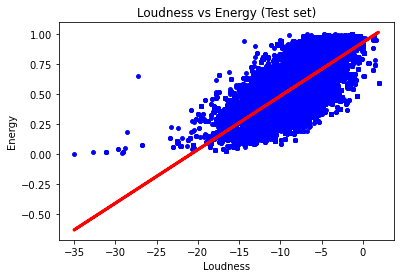

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X3_test, y3_test, color='blue', s = 15)
plot_test.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test.title('Loudness vs Energy (Test set)')
plot_test.xlabel('Loudnrankess')
plot_test.ylabel('Energy')
plot_test.show()

#### The line somewhat fits the data, but there are still many data points that aren't covered by the regression line

In [60]:
#Create objects that contain the model summary statistics.

rmse_3 = mean_squared_error(y3_test, y3_predicted) # This is the mean squared error
r2_3 = r2_score(y3_test, y3_predicted) # This is the R2 score. 

In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Slope: [[0.04473348]]
Mean squared error:  0.013019245902785597
R2 score:  0.4660214059211528


#### The slope of .0447 indicates a positive relationship between loudness and energy. As loudness increases, energy also increases to a small degree. The mean squared error is small indicating that the regression line may be an accurate representation of the data, but the r2 value of .466 indicates that the model isn't a great fit. 

In [45]:
# Create a regression object.

regression_4 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [46]:
# Fit the regression object onto the training set.

regression.fit(X4_train, y4_train)

LinearRegression()

In [47]:
# Predict the values of y using X.

y4_predicted = regression.predict(X4_test)

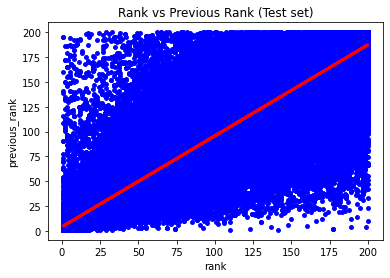

In [48]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X4_test, y4_test, color='blue', s = 15)
plot_test.plot(X4_test, y4_predicted, color='red', linewidth =3)
plot_test.title('Rank vs Previous Rank (Test set)')
plot_test.xlabel('rank')
plot_test.ylabel('previous_rank')
plot_test.show()

#### The line doesn't fit the data very well. There are many datapoints far from the trend line, with many songs having high previous ranks but low ranks and vice versa.

In [49]:
#Create objects that contain the model summary statistics.

rmse_4 = mean_squared_error(y4_test, y4_predicted) # This is the mean squared error
r2_4 = r2_score(y4_test, y4_predicted) # This is the R2 score. 

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_4)
print('R2 score: ', r2_4)

Slope: [[0.91595108]]
Mean squared error:  348.31905983839533
R2 score:  0.8853061333992273


#### The slope of .915 indicates a positive relationship between rank and previous rank. As previous rank increases, rank also increases to a small degree. The mean squared error is large indicating that the regression line may be an inaccurate representation of the data, but the r2 value of .885 indicates that the model is a good fit. 

In [68]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,43.129314
1,13,-3.727165
2,86,49.864933
3,8,44.300726
4,16,49.864933
5,24,45.764991
6,9,40.493637
7,3,44.886432
8,1,44.300726
9,79,50.157786


In [36]:
# Create a dataframe comparing the actual and predicted values of yy.

data = pd.DataFrame({'Actual': yy_test.flatten(), 'Predicted': yy_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,56,101.416525
1,145,101.496204
2,88,101.573253
3,37,59.883572
4,16,101.407665
5,166,101.184767
6,104,97.695800
7,18,100.951943
8,48,101.481088
9,79,101.635485


In [62]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.608,0.753092
1,0.296,0.480173
2,0.731,0.618310
3,0.608,0.753092
4,0.674,0.572593
5,0.788,0.648506
6,0.915,0.827842
7,0.608,0.753092
8,0.687,0.534122
9,0.716,0.568835


In [51]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y4_test.flatten(), 'Predicted': y4_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.0,18.767877
1,175.0,168.067904
2,108.0,101.203475
3,3.0,6.860513
4,153.0,173.563610
5,120.0,123.186301
6,184.0,187.302876
7,7.0,7.776464
8,193.0,168.983855
9,108.0,147.001029


#### Comparing how the regression fits the training set

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [45]:
rmse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_train)
print('R2 score: ', r2_train)

Slope: [[-3.67776509e-06]]
Mean squared error:  5872.036195837389
R2 score:  -1.8194857365136814


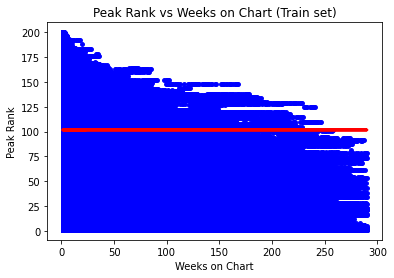

In [43]:
# Create a plot that shows the regression line from the model on the train set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Peak Rank vs Weeks on Chart (Train set)')
plot_test.xlabel('Weeks on Chart')
plot_test.ylabel('Peak Rank')
plot_test.show()

In [38]:
# Predict.

yy_predicted_train = regression.predict(Xx_train) # This is predicting Xx_train!

In [47]:
rmse_train_2 = mean_squared_error(yy_train, yy_predicted_train)
r2_train_2 = r2_score(yy_train, yy_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_train_2)
print('R2 score: ', r2_train_2)

Slope: [[-3.67776509e-06]]
Mean squared error:  3258.3153352793192
R2 score:  0.022863487607578503


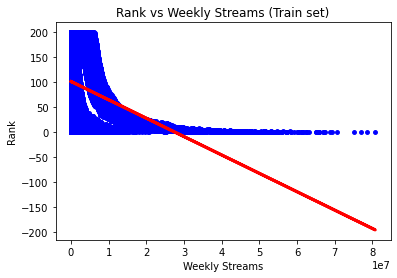

In [49]:
# Create a plot that shows the regression line from the model on the train set.

plot_test = plt
plot_test.scatter(Xx_train, yy_train, color='blue', s = 15)
plot_test.plot(Xx_train, yy_predicted_train, color='red', linewidth =3)
plot_test.title('Rank vs Weekly Streams (Train set)')
plot_test.xlabel('Weekly Streams')
plot_test.ylabel('Rank')
plot_test.show()

In [63]:
# Predict.

y3_predicted_train = regression.predict(X3_train) # This is predicting X3_train!

In [64]:
rmse_train_3 = mean_squared_error(y3_train, y3_predicted_train)
r2_train_3 = r2_score(y3_train, y3_predicted_train)

In [65]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_train_3)
print('R2 score: ', r2_train_3)

Slope: [[0.04473348]]
Mean squared error:  0.01301846396726071
R2 score:  0.4672074592934504


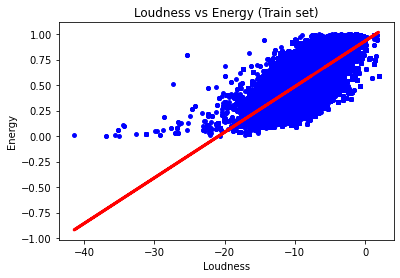

In [67]:
# Create a plot that shows the regression line from the model on the train set.

plot_test = plt
plot_test.scatter(X3_train, y3_train, color='blue', s = 15)
plot_test.plot(X3_train, y3_predicted_train, color='red', linewidth =3)
plot_test.title('Loudness vs Energy (Train set)')
plot_test.xlabel('Loudness')
plot_test.ylabel('Energy')
plot_test.show()

In [52]:
# Predict.

y4_predicted_train = regression.predict(X4_train) # This is predicting X4_train!

In [53]:
rmse_train_4 = mean_squared_error(y4_train, y4_predicted_train)
r2_train_4 = r2_score(y4_train, y4_predicted_train)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_train_4)
print('R2 score: ', r2_train_4)

Slope: [[0.91595108]]
Mean squared error:  350.972330265138
R2 score:  0.8842731600020485


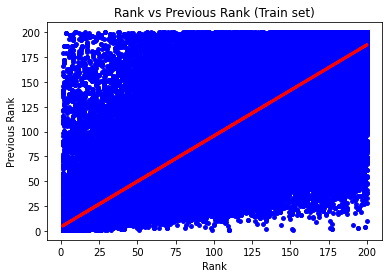

In [55]:
# Create a plot that shows the regression line from the model on the train set.

plot_test = plt
plot_test.scatter(X4_train, y4_train, color='blue', s = 15)
plot_test.plot(X4_train, y4_predicted_train, color='red', linewidth =3)
plot_test.title('Rank vs Previous Rank (Train set)')
plot_test.xlabel('Rank')
plot_test.ylabel('Previous Rank')
plot_test.show()